# Introducción a Filtros Digitales
- [Introducción](#introducción)
- [Aplicaciones de filtros digitales](#aplicaciones-de-filtros-digitales)
- [Tipos de filtros digitales](#tipos-de-filtros-digitales)
- [Diseño de filtros digitales](#diseño-de-filtros-digitales)
- [Implementación de filtros digitales en Python](#implementación-de-filtros-digitales-en-python)

## Introducción

En ingeniería electrónica, un filtro es un sistema que permite manipular el contenido en frecuencia de una señal de acuerdo a los requerimientos establecidos. Por ejemplo, un filtro puede ser utilizado para amplificar o atenuar un rango de frecuencias, o bien para eliminar o aislar un componente en frecuencia específico.

Los filtros se suelen componer de varios elementos, entre los que destacan:
- Magnitud:
    - Valor que representa la ganancia del componente en frecuencia.
    - Usualmente denotado en $dB$.
    - Cuando es 0 se busca mantener intacto el componente en frecuencia.
    - Cuando es menor a 0 se busca atenuar el componente en frecuencia.
    - Cuando es mayor a 1 se busca amplificar el componente en frecuencia.
    - Usualmente se denota como $H_\omega$.
- Banda de paso:
    - Rango de frecuencias que se busca mantener o amplificar.
- Banda de rechazo:
    - Rango de frecuencias que se busca atenuar.
- Frecuencia de corte:
    - Valor o valores en los que se presenta un cambio entre banda de paso y rechazo.
    - Este valor está determinado por la frecuencia en la que se consigue una magnitud de $-3 db$.
    - Usualmente se denota como $\omega_{c}$.


Caracteristicas
-  Alta inmunidad al ruido 
-  Alta precisión, limitada por los errores de redondeo en la aritmética empleada 
-  Fácil modificación de las características del filtro
-   Muy bajo costo

## Aplicaciones de filtros digitales

- Procesamiento de audio: Los filtros digitales se utilizan en aplicaciones de procesamiento de audio, como la mejora de la calidad de sonido, la eliminación de ruido y la ecualización.
- Comunicaciones: Los filtros digitales son esenciales en la transmisión de datos y señales de voz en sistemas de comunicaciones.
- Imágenes: Se utilizan filtros digitales en aplicaciones de procesamiento de imágenes para mejorar la claridad, reducir el ruido y realizar operaciones como la detección de bordes.
- Análisis de señales: Los filtros digitales se utilizan en aplicaciones de análisis de señales para extraer información útil de una señal y para reducir el ruido y la interferencia.
- Control de sistemas: Los filtros digitales se utilizan en sistemas de control para modelar y controlar la dinámica de sistemas reales.
- Procesamiento de señales médicas: Los filtros digitales se utilizan en aplicaciones médicas para procesar y analizar señales médicas, como electrocardiogramas.

## Tipos de filtros digitales

### Clasificación según bandas de paso
La principal clasificación de los filtros digitales se basa en los intervalos de su banda de paso, en la cual existen 4 filtros principales.

Este sistema de clasificación aplica igual para los filtros analógicos.

#### Filtro pasa bajas
- Cuenta con una única frecuencia de corte ($\omega_{c}$).
- Su banda de paso es el intervalo [0, $\omega_{c}$).
- Su banda de rechazo es el intervalo [$\omega_{c}$, $\infty$).

<img src="./figures/pasa_baja.png" width="400">

#### Filtro pasa altas
- Cuenta con una única frecuencia de corte ($\omega_{c}$).
- Su banda de paso es el intervalo ($\omega_{c}$, $\infty$).
- Su banda de rechazo es el intervalo [0, $\omega_{c}$].

<img src="./figures/pasa_alta.png" width="400">

#### Filtro pasa banda
- Cuenta con dos frecuencias de corte ($\omega_{c1}$ y $\omega_{c2}$).
- Su banda de paso es el intervalo ($\omega_{c1}$, $\omega_{c2}$).
- Sus bandas de rechazo son los intervalos [0, $\omega_{c1}$] y [$\omega_{c2}$, $\infty$).

<img src="./figures/pasa_banda.png" width="400">

#### Filtro rechaza banda
- Cuenta con dos frecuencias de corte ($\omega_{c1}$ y $\omega_{c2}$).
- Sus bandas de paso son los intervalos [0, $\omega_{c1}$) y ($\omega_{c2}$, $\infty$).
- Su banda de rechazo es el intervalo [$\omega_{c1}$, $\omega_{c2}$].

<img src="./figures/rechaza_banda.png" width="400">

>Observación: Las figuras mostradas anteriormente muestran la respuesta en frecuencia de filtros ideales, sin embargo, más adelante observaremos que los filtros reales presentan ligeros cambios respecto a los ideales.

### Clasificación según tipo de respuesta al impulso
Otra clasificación de los filtros digitales toma como referencia el tipo de respuesta al impulso que tiene cada filtro.

#### Respuesta al impulso infinita (IIR)
Los filtros de respuesta al impulso infinita (también llamados recursivos) suelen conseguir implementaciones con orden de filtro mucho menor, sin embargo presentan una fase no lineal.

Tiene como ecuación en diferencias:

$y(n) + a(2)y(n-1) + ... + a(n+1) + y(n-N) = b(1)x(n) + b(2)x(n-1) + ... + b(m+1)x(n-M)$

Tiene como función de transferencia:

$H(z) = \frac{b(1) + b(2)z^{-1} + ... + b(m+1)z^{-M}}{1+ a(2)z^{-1} + ... + a(n+1)z^{-N}} $

Caracteristicas
-	Es recursivo, o sea, que su salida además de las entradas depende de las salidas pasadas. 
-	Tiene polos y ceros, tiene problemas de estabilidad. 
-	La fase no es lineal con la frecuencia 
-	El orden del filtro es mucho menor que un filtro FIR para la misma aplicación


#### Respuesta al impulso finita (FIR)
Los filtros de respuesta al impulso finita (también llamados no recursivos)

Un filtro FIR de orden M tiene la siguiente función de transferencia:

$y(n)=b(1)x(n)+b(2)x(n-1) + ⋯ + b(m+1)x(n-M)$

Tiene como función de transferencia:

$H(z) = b(1) + b(2) z^{-1} + ⋯ + b(m+1)z^{-M}$

Caracteristicas: 

- La secuencia b(k) son los coeficientes del filtro 
- Es no recursivo, o sea, la salida depende solamente de las entradas y no de las salidas pasadas 
- La función de transferencia sólo tiene ceros, excelente estabilidad.
- Suelen requerir un orden de filtro mucho más alto que los filtros IIR para alcanzar un determinado nivel de rendimiento


## Diseño de filtros digitales

El diseño consiste en obtener los coeficientes del filtro para conseguir unos requerimientos específicos. Su implementación obedece en escoger y aplicar a una estructura particular del filtro esos coeficientes

Los filtros se normalizan a la frecuencia de Nyquist, o sea, a la frecuencia de muestreo dividida por dos:

$ f_N=\frac{f_s}{2}$

Para convertir la frecuencia normalizada a frecuencia angular se debe multiplicar por π. 

En general, el filtro está diseñado en base a especificaciones principalmente para la banda de paso, la banda de parada y la banda de transición de la respuesta de frecuencia del filtro. 

- Banda de paso del filtro es el rango de frecuencia con la ganancia de amplitud de la respuesta del filtro siendo aproximadamente la unidad. 
- Banda de parada del filtro se define como el rango de frecuencia sobre el cual se atenúa la respuesta de magnitud del filtro para eliminar la señal de entrada cuyos componentes de frecuencia están dentro de ese rango. 
- Banda de transición denota el rango de frecuencia entre la banda de paso y la banda de parada. 

<img src="./figures/c_Filtro.png" width="400">

La transición de la respuesta en frecuencia de la banda de paso a la banda eliminada define la banda de transición o región de transición del filtro. La frecuencia de corte ωp define el límite superior de la banda de paso y la frecuencia ωs designa el comienzo de la banda eliminada. 

Por tanto, la anchura de la banda de transición es ωs − ωp. La anchura de la banda de paso normalmente se denomina ancho de banda del filtro. 

Si existe rizado en la banda de paso del filtro, su valor se designa mediante δ1, y el módulo |H(ω)| varía entre los límites 1±δ1. El rizado de la banda eliminada del filtro se designa como δ2.

Para acomodar un rango dinámico grande en la gráfica de la respuesta en frecuencia de cualquier filtro, es habitual utilizar una escala logarítmica para el módulo |H(ω)|. En consecuencia, el rizado en la banda de paso es 20log10 δ1 decibelios, y en la banda eliminada es 20log10 δ2.

En cualquier problema de diseño de filtros podemos especificar: 
- el rizado máximo de la banda de paso tolerable 
- el rizado máximo de la banda eliminada tolerable, 
- la frecuencia de corte de la banda de paso ωp 
- la frecuencia de corte de la banda eliminada ωs. 

Basándonos en estas especificaciones, podemos seleccionar los parámetros {ak} y {bk} de la respuesta en frecuencia, que proporcionen la mejor aproximación a la especificación deseada. El grado en que H(ω) se aproxime a la especificación depende en parte de los criterios utilizados para seleccionar los coeficientes del filtro {ak} y {bk}, así como de las cantidades (M,N) de coeficientes.

### Diseño de filtros IIR

Filtro Butterworth

Comprende diseños de filtros pasabajo, pasa banda, pasa alto, y banda rechazo. La respuesta en magnitud es plana en la banda de paso. Filtro pasabajo de orden n con frecuencia de corte wn

$H(z) =\frac{B(z)}{A(z)} = \frac{b(1)+b(2)z^{-1} + ... + b(n+1)z^{-n}}{1 + a(2)z^{-1} + ... + a(n+1)z^{-n}} $

Tipo= high, low, bandpass, bandstop (wn=[w1 w2])

La frecuencia de corte es donde la magnitud del filtro es $|H(jΩ)|= \frac{sqrt(2)}{2}=0.707$ en  Ω=1


<img src="./figures/Filtro_Butterworth.png" width="400">

Filtro Chebyshev Tipo I

Minimiza la diferencia entre el ideal y la respuesta de frecuencia actual sobre la banda de paso incorporando un equiriple de Rp dB en la banda de paso. La respuesta en la banda rechazo es plana (maximally flat). La transición de la banda de paso a la banda de rechazo es más rápida que en el de Butterworth.

$ |H(jΩ)|= 10^{\frac{-Rp}{20}} $
en  $ Ω = 1 $


<img src="./figures/Filtro_Chebyshev.png" width="400">

El orden del filtro es n con frecuencia de corte en la banda de paso normalizada en Wp y R dB de riple pico a pico en la banda de paso.

Filtro Chebyshev Tipo II

Minimiza la diferencia con el filtro ideal en la banda stop incorporando un equiriple de Rs dB en la banda stop. La respuesta en la banda de paso es plana (Maximally flat). 

$|H(jΩ)| = 10^{\frac{-Rs}{20}}$  en  $Ω = 1$      

<img src="./figures/Filtro_Chebyshev_II.png" width="400">

Filtro Elíptico 

Es un filtro equiriple tanto en la banda de paso como en la banda de rechazo. Riple en la banda de paso Rp, riple en la banda stop Rs. Minimiza el ancho de la transición.

$|H(jΩ)|=10^{\frac{-Rp}{20}}$  en $Ω = 1$


<img src="./figures/Filtro_Eliptico.png" width="400">

### Diseño de filtros FIR

| Método de diseño de filtro | Descripción | 
| --- | --- | 
| Ventanas | Aplicar ventanas a la transformada inversa de Fourier truncada del filtro especificado. Tipos de ventanas: Rectangular, Barlett, Hann, Hamming, Blackman, Kaiser |
| Multibanda con bandas de transición | Método de equiripple o de mínimos cuadrados en las sub-bandas del intervalo de frecuencias | 
| Mínimos cuadrados restringidos | Minimizar la integral del cuadrado del error en todo el intervalo de frecuencias con restricciones de error máximo. La restricción consiste en que no es necesario definir las bandas de transición. Permite considerar umbrales más altos o más bajos con riple máximo permisible. |
| Respuesta arbitraria | Respuestas arbitrarias, incluidos los filtros complejos y de fase no lineal |
| Coseno alzado | Respuesta de paso bajo con transición suave y sinusoidal |

A excepción de la Respuesta arbitraria, todas las funciones de diseño de filtros FIR diseñan únicamente filtros de fase lineal. Los coeficientes del filtro obedecen a una relación de simetría par o impar. En función de esta simetría y de si el orden n del filtro es par o impar, un filtro de fase lineal (almacenado en la longitud n+1 del vector b) tiene ciertas restricciones inherentes a su respuesta en frecuencia.

| Tipo de filtro de fase lineal | Orden del filtro | Respuesta H(f), f = 0 | Respuesta H(f), f = 1 (Nyquist) |
| --- | --- | --- | --- |
| Tipo I | Par | Sin restricción | Sin restricción |
| Tipo II | Impar | Sin restricción | $H(1) = 0$ |
| Tipo III | Par | $H(0)=0$ | $H(1) = 0$ |
| Tipo IV | Impar | $H(0)=0$ | Sin restricción |


## Implementación de filtros digitales en Python

In [19]:
## Librerías
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from pylab import *

#### Filtros IIR

##### Filtro Pasa Bajas

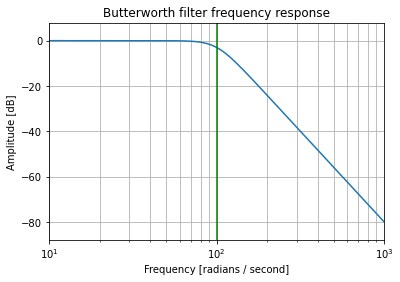

In [4]:
## Filtro Butterworth de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100,btype='low', analog=True, ftype='butter')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

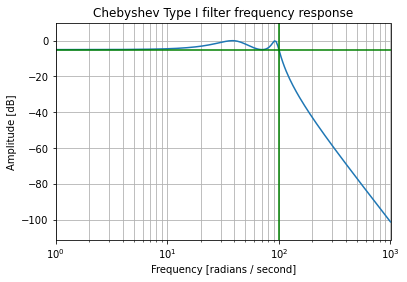

In [6]:
## Filtro Chebyshev Tipo I de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100,rp = 5,btype='low', analog=True, ftype='cheby1')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

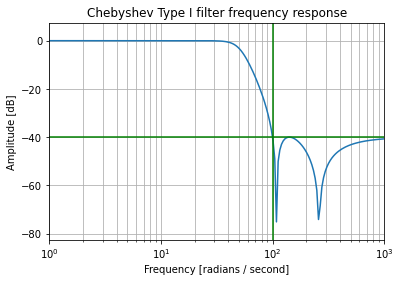

In [7]:
## Filtro Chebyshev Tipo II de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100,rs = 40,btype='low', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rp
plt.show()

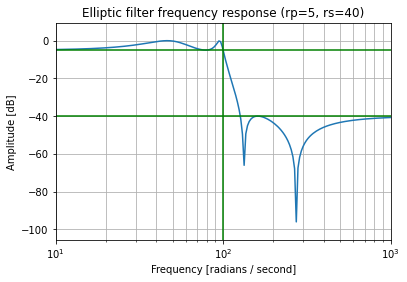

In [8]:
## Filtro Elliptico de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100, rp=5,rs=40,
                        btype='low', analog=True, ftype='ellip')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Elliptic filter frequency response (rp=5, rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.axhline(-5, color='green') # rp
plt.show()

##### Filtro Pasa Altas

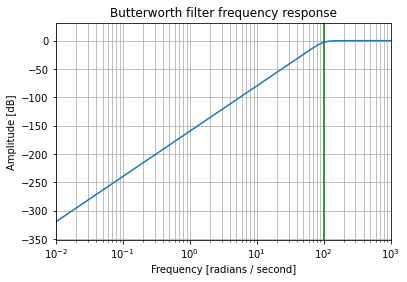

In [11]:
## Filtro Butterworth de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100,btype='high', analog=True, ftype='butter')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

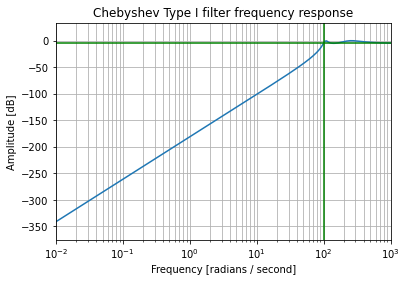

In [12]:
## Filtro Chebyshev Tipo I de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100,rp = 5,btype='high', analog=True, ftype='cheby1')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

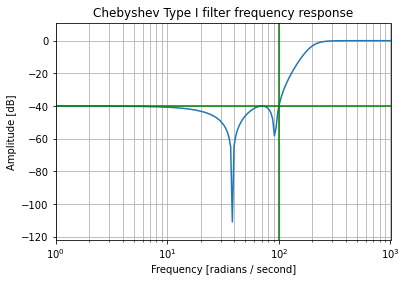

In [13]:
## Filtro Chebyshev Tipo II de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100,rs = 40,btype='high', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rp
plt.show()

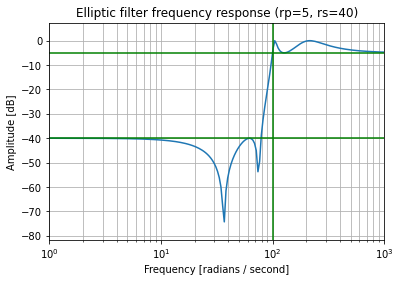

In [14]:
## Filtro Elliptico de 100 Hz de orden 4

b, a = signal.iirfilter(N=4, Wn=100, rp=5,rs=40,
                        btype='high', analog=True, ftype='ellip')
w, h = signal.freqs(b, a)
fig = plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Elliptic filter frequency response (rp=5, rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.axhline(-5, color='green') # rp
plt.show()

##### Filtro Pasa Bandas

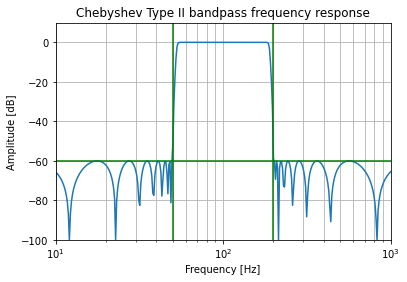

In [10]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 17.

b, a = signal.iirfilter(N=17,Wn= [2*np.pi*50, 2*np.pi*200], rs=60,
                        btype='band', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.axvline(50, color='green') # cutoff frequency
plt.axvline(200, color='green') # cutoff frequency
plt.axhline(-60, color='green') # rs
plt.show()

##### Filtro Rechaza bandas

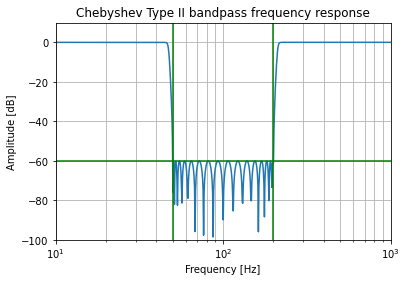

In [21]:
## Filtro Chebyshev II de 50 Hz–200 Hz de orden 17.

b, a = signal.iirfilter(N=17,Wn= [2*np.pi*50, 2*np.pi*200], rs=60,
                        btype='stop', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.axvline(50, color='green') # cutoff frequency
plt.axvline(200, color='green') # cutoff frequency
plt.axhline(-60, color='green') # rs
plt.show()

#### Filtros FIR: Método Ventana

##### Filtro Pasa Bajas

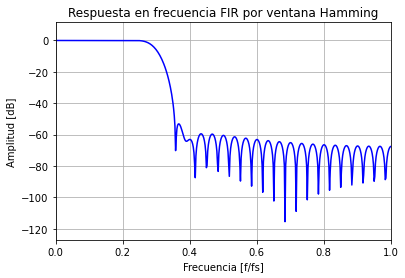

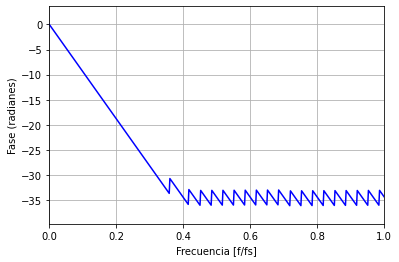

In [41]:
## Filtro Hamming

n  = 61
fc = 0.3
b  = signal.firwin(n, fc, window='hamming')
w, h = signal.freqz(b)
plt.figure()
plt.plot(w/(max(w)), 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia FIR por ventana Hamming')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [f/fs]')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)

plt.figure()
angles = np.unwrap(np.angle(h))
plt.plot(w/(max(w)), angles, 'b')
plt.ylabel('Fase (radianes)')
plt.xlabel('Frecuencia [f/fs]')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.show()

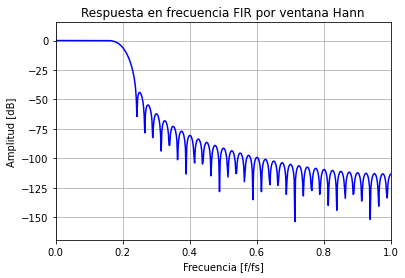

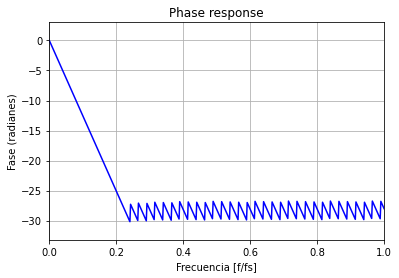

In [37]:
## Filtro Hann

n  = 81
fc = 0.2
b  = signal.firwin(n, fc, window='hann')
w, h = signal.freqz(b)
plt.figure()
plt.plot(w/(max(w)), 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia FIR por ventana Hann')
plt.ylabel('Amplitud [dB]')
plt.xlabel('Frecuencia [f/fs]')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)

plt.figure()
angles = np.unwrap(np.angle(h))
plt.plot(w/(max(w)), angles, 'b')
plt.ylabel('Fase (radianes)')
plt.xlabel('Frecuencia [f/fs]')
plt.title('Phase response')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.show()

##### Filtro Pasa Altas

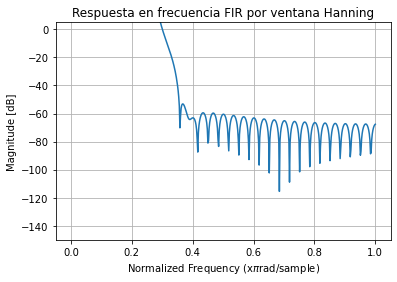

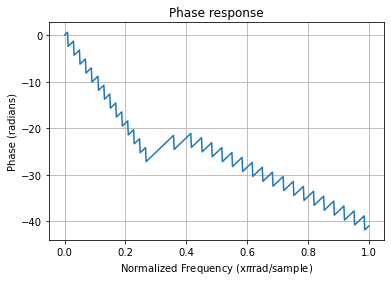

In [42]:
n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False)
w,h = signal.freqz(b,a)
h_dB = 20 * log10 (abs(h))
plt.figure()
plt.plot(w/max(w),h_dB)
plt.ylim(-150, 5)
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Respuesta en frecuencia FIR por ventana Hanning')
plt.grid(which='both', axis='both')
plt.show()

plt.figure()
h_Phase = unwrap(arctan2(imag(h),real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Phase response')
plt.grid(which='both', axis='both')
plt.show()

##### Filtro Pasa Bandas

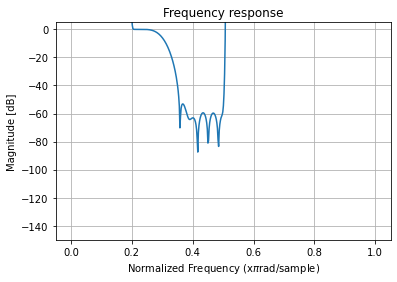

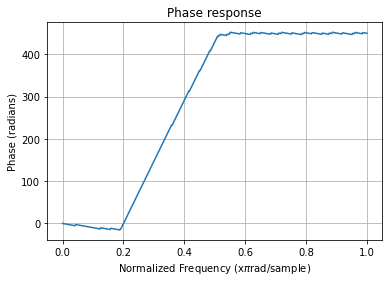

In [55]:
n = 1001
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = False)
w,h = signal.freqz(b,a)
h_dB = 20 * log10 (abs(h))
plt.figure()
plt.plot(w/max(w),h_dB)
plt.ylim(-150, 5)
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Frequency response')
plt.grid(which='both', axis='both')
plt.show()

plt.figure()
h_Phase = unwrap(arctan2(imag(h),real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Phase response')
plt.grid(which='both', axis='both')
plt.show()

##